## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cleanest_df = mouse_metadata.merge(study_results,how='outer',on='Mouse_ID')
# Display the data table for preview
cleanest_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21.0,16.0,0,45.0000,0
1,k403,Ramicane,Male,21.0,16.0,5,38.8259,0
2,k403,Ramicane,Male,21.0,16.0,10,35.0143,1
3,k403,Ramicane,Male,21.0,16.0,15,34.2240,1
4,k403,Ramicane,Male,21.0,16.0,20,32.9977,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9.0,30.0,25,63.1457,2
1889,z969,Naftisol,Male,9.0,30.0,30,65.8410,3
1890,z969,Naftisol,Male,9.0,30.0,35,69.1762,4
1891,z969,Naftisol,Male,9.0,30.0,40,70.3149,4


In [5]:
# Checking the number of mice.
cleanest_df["Mouse_ID"].value_counts()

g989    13
c302    10
g497    10
c559    10
p189    10
        ..
v199     1
x226     1
u153     1
n482     1
h428     1
Name: Mouse_ID, Length: 249, dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = cleanest_df.groupby(['Mouse_ID','Timepoint']).count().duplicated(keep=False)


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [8]:
# Checking the number of mice in the clean DataFrame.
cleanest_df["Mouse_ID"].count()

1893

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_df = cleanest_df.groupby(['Drug_Regimen'])

tumor_mean = grouped_df['Tumor_Volume_(mm3)'].mean()
tumor_median = grouped_df['Tumor_Volume_(mm3)'].median()
tumor_var = grouped_df['Tumor_Volume_(mm3)'].var()
tumor_std = grouped_df['Tumor_Volume_(mm3)'].std()
tumor_sem = grouped_df['Tumor_Volume_(mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({'Mean': tumor_mean, 'Median':tumor_median, 'Var':tumor_var, 'Std':tumor_std, 'SEM': tumor_sem})
summary_stats


,Mean,Median,Var,Std,SEM
Drug_Regimen,,,,,
Capomulin,40.675738,41.55780,24.947786,4.994776,0.329346
Ceftamin,52.591173,51.77620,39.290138,6.268185,0.469820
Infubinol,52.884794,51.82055,43.128680,6.567243,0.492236
Ketapril,55.235639,53.69870,68.553505,8.279704,0.603860
Naftisol,54.331568,52.50930,66.173455,8.134707,0.596466
Placebo,54.033582,52.28890,61.168110,7.821004,0.581331
Propriva,52.322551,50.85460,42.351080,6.507771,0.512884
Ramicane,40.216746,40.67320,23.486707,4.846309,0.320955
Stelasyn,54.233148,52.43170,59.450540,7.710418,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ_stats_df = grouped_df['Tumor_Volume_(mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
summ_stats_df

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675738,41.55780,24.947786,4.994776,0.329346
Ceftamin,52.591173,51.77620,39.290138,6.268185,0.469820
Infubinol,52.884794,51.82055,43.128680,6.567243,0.492236
Ketapril,55.235639,53.69870,68.553505,8.279704,0.603860
Naftisol,54.331568,52.50930,66.173455,8.134707,0.596466
Placebo,54.033582,52.28890,61.168110,7.821004,0.581331
Propriva,52.322551,50.85460,42.351080,6.507771,0.512884
Ramicane,40.216746,40.67320,23.486707,4.846309,0.320955
Stelasyn,54.233148,52.43170,59.450540,7.710418,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

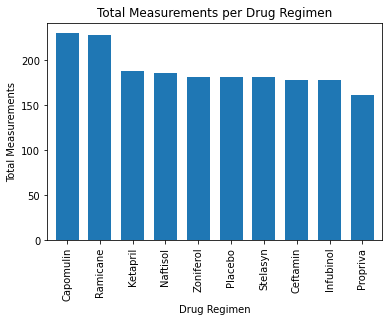

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_chart = cleanest_df['Drug_Regimen'].value_counts().plot.bar(width = 0.7)

count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('Total Measurements')

count_chart.set_title('Total Measurements per Drug Regimen')

plt.show


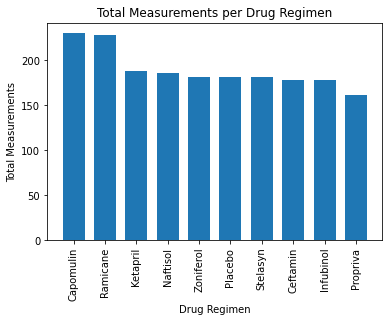

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug = cleanest_df['Drug_Regimen'].value_counts()
x_axis = np.arange(len(drug))

plt.bar(x_axis, drug, width = 0.7)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug.index.values)
plt.xticks(rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('Total Measurements')
plt.title('Total Measurements per Drug Regimen')

plt.show()

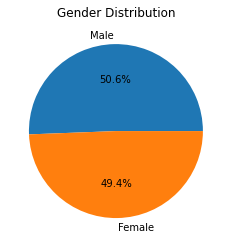

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dis = cleanest_df['Sex'].value_counts()
gender_pie = gender_dis.plot.pie(title='Gender Distribution',autopct="%1.1f%%")
gender_pie.set_ylabel('')
gender_pie

Text(0.5, 1.0, 'Gender Distribution')

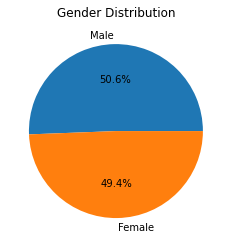

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_dis2 = cleanest_df['Sex'].value_counts()

labels = ['Male', 'Female']

plt.pie(gender_dis2, labels=labels,autopct="%1.1f%%",startangle=0)
plt.title('Gender Distribution')


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_df = pd.DataFrame(cleanest_df.groupby('Mouse_ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max_TP'})
max_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(cleanest_df, max_df, on='Mouse_ID')
new_df.sample(15)

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites,Max_TP
1205,m756,Infubinol,Male,19.0,30.0,5,47.0104,1,5
1095,k894,Zoniferol,Female,13.0,29.0,40,58.6471,4,45
156,t565,Capomulin,Female,20.0,17.0,5,45.8956,0,45
661,c302,Zoniferol,Female,10.0,29.0,15,52.7166,2,45
1217,n630,Propriva,Female,15.0,29.0,0,45.0000,0,5
1555,t718,Placebo,Female,10.0,30.0,15,48.0851,1,45
1708,w540,Stelasyn,Female,8.0,26.0,20,50.6727,2,25
902,g570,Propriva,Male,16.0,29.0,40,68.5259,2,45
79,z578,Ramicane,Male,11.0,16.0,20,36.8900,0,45
1882,z795,Naftisol,Female,13.0,29.0,45,65.7411,3,45


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    list_df = new_df.loc[new_df['Drug_Regimen'] == treatment]
    final_volume_df = list_df.loc[list_df['Timepoint'] == list_df['Max_TP']]
    
    # add subset 
    values = final_volume_df['Tumor_Volume_(mm3)']
    tumor_vol_data.append(values)

    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

IQR for Capomulin: 7.781799999999997
Lower Bound for Capomulin: 20.704700000000006
Upper Bound for Capomulin: 51.83189999999999
Values below 20.704700000000006 could be outliers.
Values above 51.83189999999999 could be outliers.
IQR for Ramicane: 9.098499999999998
Lower Bound for Ramicane: 17.912750000000003
Upper Bound for Ramicane: 54.306749999999994
Values below 17.912750000000003 could be outliers.
Values above 54.306749999999994 could be outliers.
IQR for Infubinol: 11.4771
Lower Bound for Infubinol: 36.83295
Upper Bound for Infubinol: 82.74135
Values below 36.83295 could be outliers.
Values above 82.74135 could be outliers.
IQR for Ceftamin: 15.577700000000007
Lower Bound for Ceftamin: 25.355549999999987
Upper Bound for Ceftamin: 87.66635000000002
Values below 25.355549999999987 could be outliers.
Values above 87.66635000000002 could be outliers.


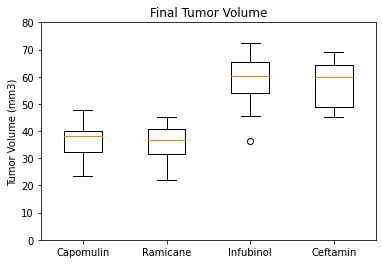

In [20]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4], treatments)
plt.title('Final Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim([0, 80])
plt.show()

## Line and Scatter Plots

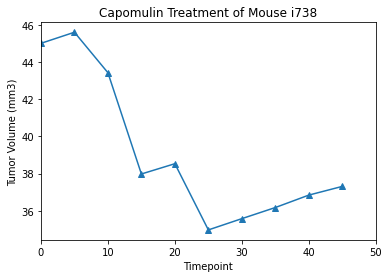

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treatment = cleanest_df.loc[cleanest_df['Mouse_ID'] == 'i738']

plt.plot(treatment['Timepoint'],treatment['Tumor_Volume_(mm3)'],marker = '^')
plt.title('Capomulin Treatment of Mouse i738')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,50)
plt.xlim(0,50)
plt.show()

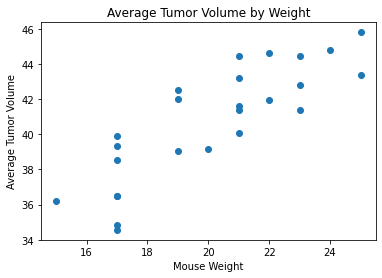

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = cleanest_df.loc[cleanest_df['Drug_Regimen'] == 'Capomulin']

avg_df = pd.DataFrame(cap_df.groupby('Mouse_ID')['Tumor_Volume_(mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor_Volume_(mm3)': 'Avg_Tumor_Vol'})

avg_df = pd.merge(cap_df, avg_df, on='Mouse_ID')
final_vol_df = avg_df[['Weight_(g)', 'Avg_Tumor_Vol']].drop_duplicates()
final_vol_df

plt.scatter(final_vol_df['Weight_(g)'],final_vol_df['Avg_Tumor_Vol'])
plt.title('Average Tumor Volume by Weight')
plt.ylabel("Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.show()

## Correlation and Regression

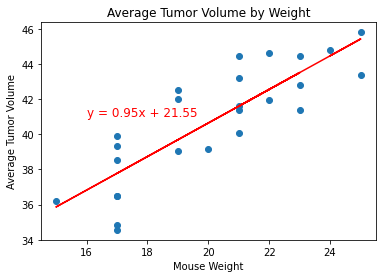

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_df = cleanest_df.loc[cleanest_df['Drug_Regimen'] == 'Capomulin']

avg_df = pd.DataFrame(cap_df.groupby('Mouse_ID')['Tumor_Volume_(mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor_Volume_(mm3)': 'Avg_Tumor_Vol'})

avg_df = pd.merge(cap_df, avg_df, on='Mouse_ID')
final_vol_df = avg_df[['Weight_(g)', 'Avg_Tumor_Vol']].drop_duplicates()
final_vol_df
avg_vol = final_vol_df['Avg_Tumor_Vol']
weight = final_vol_df['Weight_(g)']


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
tv_fit = slope * weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(weight,avg_vol)
plt.plot(weight,tv_fit,"r-")
plt.title('Average Tumor Volume by Weight')
plt.ylabel("Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.annotate(line_eq,(16,41),fontsize=12,color="red")


plt.show()


In [24]:
print(f"The correlation coefficient between average tumor volume and mouse weight is {round(st.pearsonr(final_vol_df['Weight_(g)'],avg_vol)[0],2)}")

The correlation coefficient between average tumor volume and mouse weight is 0.84
